In [27]:
import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import preprocessing
from keras.models import Model, Sequential
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
import pandas as pd
import glob
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb

In [28]:
def data_train():
        path_train=glob.glob('200_A_P/Train_200/*/*.png')
        
        data = pd.DataFrame(index=np.arange(0,len(path_train)), columns=['sublabel','path','M_F_200'])
        patient_id=[]
        sublabel=[]
        class_200=[]
        for i in range(len(path_train)):
                sublabel.append(path_train[i].split('\\')[1])
                class_200.append('Sublabel')
        data['path']=path_train
        data['sublabel']=sublabel
        data['M_F_200']=class_200
        return data

data_train=data_train()
#print('Number of images in the training set is {}'.format(len(data_train)))
#print(data_train['sublabel'].unique()==data_test['sublabel'].unique())
#print(data_test['sublabel'].unique())
#print(data_train['sublabel'].unique())



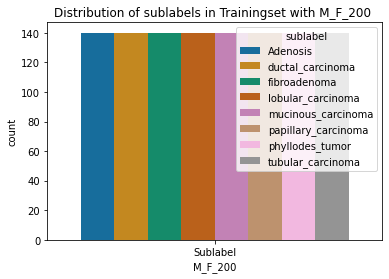

In [29]:
ax = sns.countplot(x="M_F_200",hue='sublabel', data=data_train,palette="colorblind").set_title('Distribution of sublabels in Trainingset with M_F_200 ')


 Digramm shows the Distribution of  of 8 subclasses in the Training set

In [30]:
def data_test():
        path_valid = glob.glob('200_A_P/Test_200/*/*.png', recursive=True)

        data = pd.DataFrame(index=np.arange(0, len(path_valid )), columns=['sublabel', 'path','M_F_200'])
        patient_id = []
        sublabel = []
        class_200=[]
        for i in range(len(path_valid )):
            sublabel.append(path_valid [i].split('\\')[1])
            class_200.append('Sublabel')
        data['path'] = path_valid
        data['sublabel'] = sublabel
        data['M_F_200']=class_200
        return data
data_test=data_test()
print('Number of images in the testing set is {}'.format(len(data_test)))
print(data_test['sublabel'].unique())

Number of images in the testing set is 320
['Adenosis' 'ductal_carcinoma' 'fibroadenoma' 'lobular_carcinoma'
 'mucinous_carcinoma' 'papillary_carcinoma' 'phyllodes_tumor'
 'tubular_carcinoma']


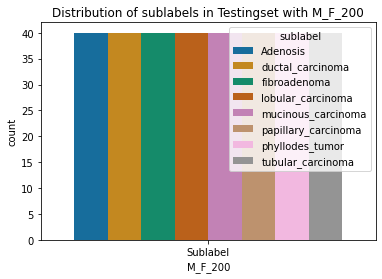

In [31]:
ax = sns.countplot(x="M_F_200",hue='sublabel', data=data_test,palette="colorblind").set_title('Distribution of sublabels in Testingset with M_F_200')


 Digramm shows the Distribution of  of 8 subclasses in the Testing set

In [32]:
def data_train():
    train_images=[]
    train_labels=[]
    SIZE=224
    i=0
    for directory_path in glob.glob("200_A_P/Train_200/*"):
        label = directory_path.split('\\')[-1]
        for img_path  in glob.glob(os.path.join(directory_path,"*.png")):    
            try:
                img = cv2.imread(img_path)       
                img = cv2.resize(img, (SIZE, SIZE))
                train_images.append(img)
                train_labels.append(label)
            except:
                break
    return train_images,train_labels
        
train_images,train_labels=data_train()
print(len(train_images))

1120


In [33]:
def data_test():
    test_images=[]
    test_labels=[]
    SIZE=224
    for directory_path in glob.glob("200_A_P/Test_200/*"):
        label = directory_path.split('\\')[-1]
        for img_path in glob.glob(os.path.join(directory_path,"*.png")):
            try:
                img = cv2.imread(img_path) 
                img = cv2.resize(img, (SIZE, SIZE))
                test_images.append(img)
                test_labels.append(label)
            except:
                break
    return test_images,test_labels
        
test_images,test_labels=data_test()
print(len(test_labels))

320


In [34]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)





In [35]:

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)





In [36]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train=train_images
y_train=train_labels_encoded
x_test=test_images
y_test = test_labels_encoded



transform pixel in number between [0,1]

In [37]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [38]:
SIZE=224
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [40]:
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features

In [41]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
X_for_test = X_test_features

In [44]:
learning_rate_list = [0.05, 0.1,0.01]
max_depth_list = [3, 5,7,10]
n_estimators_list = [2000, 3000,5000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

36


{'learning_rate': [0.05, 0.1, 0.01],
 'max_depth': [3, 5, 7, 10],
 'n_estimators': [2000, 3000, 5000]}

In [45]:

model_xgboost_fin = xgb.XGBClassifier(learning_rate=0.01,
                                          max_depth=5,
                                          n_estimators=5000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_for_training, y_train),(X_test_features, y_test)]

model_xgboost_fin.fit(X_for_training,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.90221	validation_1-auc:0.87486
[1]	validation_0-auc:0.95940	validation_1-auc:0.91108
[2]	validation_0-auc:0.97105	validation_1-auc:0.92623
[3]	validation_0-auc:0.98312	validation_1-auc:0.93364
[4]	validation_0-auc:0.98660	validation_1-auc:0.94175
[5]	validation_0-auc:0.98993	validation_1-auc:0.94301
[6]	validation_0-auc:0.99296	validation_1-auc:0.95003
[7]	validation_0-auc:0.99467	validation_1-auc:0.95337
[8]	validation_0-auc:0.99580	validation_1-auc:0.95479
[9]	validation_0-auc:0.99638	validation_1-auc:0.95778
[10]	validation_0-auc:0.99727	validation_1-auc:0.95762
[11]	validation_0-auc:0.99763	validation_1-auc:0.95775
[12]	validation_0-auc:0.99816	validation_1-auc:0.95854
[13]	validation_0-auc:0.99829	validation_1-auc:0.96169
[14]	validation_0-auc:0.99860	validation_1-auc:0.96494
[15]	validation_0-auc:0.99874	validation_1-auc:0.96585
[16]	validation_0-auc:0.99885	validation_1-auc:0.96717
[17]	validation_0-auc:0.99904	validation_1-auc:0.96795
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.25,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

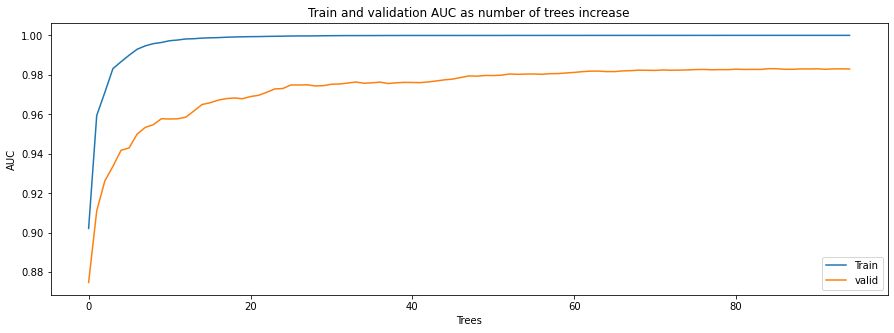

In [46]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [47]:
y_train_pred = model_xgboost_fin.predict_proba(X_for_training)
y_valid_pred = model_xgboost_fin.predict_proba(X_test_features)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred,multi_class="ovr"),
                                                    roc_auc_score(y_test, y_valid_pred,multi_class="ovr")))

AUC Train: 1.0000
AUC Valid: 0.9831


In [48]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [49]:
y_pred = model_xgboost_fin.predict(X_test_features)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(predictions)
prediction_0 = le.inverse_transform(predictions)


Accuracy: 81.25%
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 2, 7, 4, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 7, 4, 3, 3, 3, 3, 3, 2, 7, 4, 3, 4, 4, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 4, 3, 3, 6, 3, 3, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1, 0, 4, 4, 0, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 0, 6, 4, 3, 3, 3, 3, 3, 5, 6, 3, 7, 5, 5, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 1, 1, 7, 1, 1, 1, 1, 7, 0, 0, 3, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [50]:
from sklearn.metrics import confusion_matrix
cm_grid = confusion_matrix(test_labels, prediction_0)

[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'DC'),
 Text(0, 2.5, 'FB'),
 Text(0, 3.5, 'LC'),
 Text(0, 4.5, 'MC'),
 Text(0, 5.5, 'PC'),
 Text(0, 6.5, 'PT'),
 Text(0, 7.5, 'TA')]

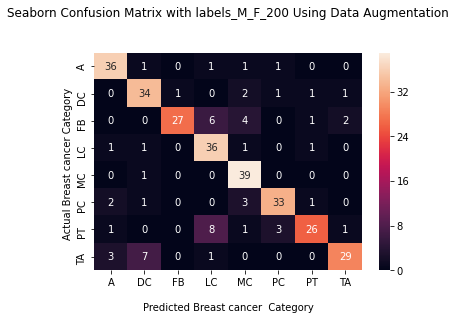

In [51]:
ax=sns.heatmap(cm_grid, annot=True)
ax.set_title('Seaborn Confusion Matrix with labels_M_F_200 Using Data Augmentation\n\n');
ax.set_xlabel('\nPredicted Breast cancer  Category')
ax.set_ylabel('Actual Breast cancer Category ')
ax.xaxis.set_ticklabels(['A','DC','FB','LC','MC','PC','PT','TA'])
ax.yaxis.set_ticklabels(['A','DC','FB','LC','MC','PC','PT','TA'])

In [88]:

Tp_0=cm_grid[0,0]
Tp_1=cm_grid[1,1]
Tp_2=cm_grid[2,2]
Tp_3=cm_grid[3,3]
Tp_4=cm_grid[4,4]
Tp_5=cm_grid[5,5]
Tp_6=cm_grid[6,6]
Tp_7=cm_grid[7,7]

FN_0=cm_grid[0,1]+cm_grid[0,2]+cm_grid[0,3]+cm_grid[0,4]+cm_grid[0,5]+cm_grid[0,6]+cm_grid[0,7]
FN_1=cm_grid[1,0]+cm_grid[1,2]+cm_grid[1,3]+cm_grid[1,4]+cm_grid[1,5]+cm_grid[1,6]+cm_grid[1,7]
FN_2=cm_grid[2,0]+cm_grid[2,1]+cm_grid[2,3]+cm_grid[2,4]+cm_grid[2,5]+cm_grid[2,6]+cm_grid[2,7]
FN_3=cm_grid[3,0]+cm_grid[3,1]+cm_grid[3,2]+cm_grid[3,4]+cm_grid[3,5]+cm_grid[3,6]+cm_grid[3,7]
FN_4=cm_grid[4,0]+cm_grid[4,1]+cm_grid[4,2]+cm_grid[4,3]+cm_grid[4,5]+cm_grid[4,6]+cm_grid[4,7]
FN_5=cm_grid[5,0]+cm_grid[5,1]+cm_grid[5,2]+cm_grid[5,3]+cm_grid[5,4]+cm_grid[5,6]+cm_grid[5,7]
FN_6=cm_grid[6,0]+cm_grid[6,1]+cm_grid[6,2]+cm_grid[6,3]+cm_grid[6,4]+cm_grid[6,5]+cm_grid[6,7]
FN_7=cm_grid[7,0]+cm_grid[7,1]+cm_grid[7,2]+cm_grid[7,3]+cm_grid[7,4]+cm_grid[7,5]+cm_grid[7,6]



Fp_0=cm_grid[1,0]+cm_grid[2,0]+cm_grid[3,0]+cm_grid[4,0]+cm_grid[5,0]+cm_grid[6,0]+cm_grid[7,0]
Fp_1=cm_grid[0,1]+cm_grid[2,1]+cm_grid[3,1]+cm_grid[4,1]+cm_grid[5,1]+cm_grid[6,1]+cm_grid[7,1]
Fp_2=cm_grid[0,2]+cm_grid[1,2]+cm_grid[3,2]+cm_grid[4,2]+cm_grid[5,2]+cm_grid[6,2]+cm_grid[7,2]
Fp_3=cm_grid[0,3]+cm_grid[1,3]+cm_grid[2,3]+cm_grid[4,3]+cm_grid[5,3]+cm_grid[6,3]+cm_grid[7,3]
Fp_4=cm_grid[0,4]+cm_grid[1,4]+cm_grid[2,4]+cm_grid[3,4]+cm_grid[5,4]+cm_grid[6,4]+cm_grid[7,4]
Fp_5=cm_grid[0,5]+cm_grid[1,5]+cm_grid[2,5]+cm_grid[3,5]+cm_grid[4,5]+cm_grid[6,5]+cm_grid[7,5]
Fp_6=cm_grid[0,6]+cm_grid[1,6]+cm_grid[2,6]+cm_grid[3,6]+cm_grid[4,6]+cm_grid[5,6]+cm_grid[7,6]
Fp_7=cm_grid[0,7]+cm_grid[1,7]+cm_grid[2,7]+cm_grid[3,7]+cm_grid[4,7]+cm_grid[5,7]+cm_grid[6,7]

l=[]
for i in range(len(cm_grid)):
    for j in range(len(cm_grid)):
        l.append(cm_grid[i,j])
        
    
Tn_0=sum(l)-Tp_0-FN_0-Fp_0
Tn_1=sum(l)-Tp_1-FN_1-Fp_1
Tn_2=sum(l)-Tp_2-FN_2-Fp_2
Tn_3=sum(l)-Tp_3-FN_3-Fp_3
Tn_4=sum(l)-Tp_4-FN_4-Fp_4
Tn_5=sum(l)-Tp_5-FN_5-Fp_5
Tn_6=sum(l)-Tp_6-FN_6-Fp_6
Tn_7=sum(l)-Tp_7-FN_7-Fp_7

TP=[Tp_0,Tp_1,Tp_2,Tp_3,Tp_4,Tp_5,Tp_6,Tp_7]
FN=[FN_0,FN_1,FN_2,FN_3,FN_4,FN_5,FN_6,FN_7]
FP=[Fp_0,Fp_1,Fp_2,Fp_3,Fp_4,Fp_5,Fp_6,Fp_7]
TN=[Tn_0,Tn_1,Tn_1,Tn_2,Tn_3,Tn_4,Tn_6,Tn_7]

df=pd.DataFrame(index=np.arange(0,8),columns=['TP','FN','FP','TN'])
df['TP']=TP
df['FN']=FN
df['FP']=FP
df['TN']=TN
print(df)




   TP  FN  FP   TN
0  36   4   7  273
1  34   6  11  269
2  27  13   1  269
3  36   4  16  279
4  39   1  12  264
5  33   7   5  268
6  26  14   4  276
7  29  11   4  276


In [89]:
df.rename(index={0:'A',1:'DC',2:'FB',3:'LC',4:'MC',5:'PC',6:'PT',7:'TA'},inplace=True)

df

,TP,FN,FP,TN
A,36,4,7,273
DC,34,6,11,269
FB,27,13,1,269
LC,36,4,16,279
MC,39,1,12,264
PC,33,7,5,268
PT,26,14,4,276
TA,29,11,4,276


In [90]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
sublabel=['A','DC','FB','LC','MC','PC','PT','TA']
ds=['TP','FN','FP','TN']
colors = ["#c9d9d3", "#718dbf", "#e84d60",'#ffa180']

data = {'sublabel' : sublabel,
        'TP'   : [36,34,27,36,39,33,26,29],
        'FN'   : [4,6,13,4,1,7,14,11],
        'FP'   : [7,11,1,16,12,5,4,4],
        'TN'  :[273,269,269,279,264,268,276,276]  
       }
p = figure(x_range=sublabel, height=250, title="Number of TP,FN,FP,TN with Magnification factors 200X & Data Augumentation",
           toolbar_location=None, tools="hover", tooltips="$name @fruits: @$name")

p.vbar_stack(ds, x='sublabel', width=0.9, color=colors, source=data,
             legend_label=ds)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

In [91]:
from sklearn.metrics import classification_report
>>> target_names =['Adenosis', 'ductal_carcinoma','fibroadenoma','lobular_carcinoma','mucinous-carcinoma','papillary-carcinoma','phyllodes_tumor','tubular-adenoma']
>>> print(classification_report(y_test, predictions,target_names=target_names))

                     precision    recall  f1-score   support

           Adenosis       0.84      0.90      0.87        40
   ductal_carcinoma       0.76      0.85      0.80        40
       fibroadenoma       0.96      0.68      0.79        40
  lobular_carcinoma       0.69      0.90      0.78        40
 mucinous-carcinoma       0.76      0.97      0.86        40
papillary-carcinoma       0.87      0.82      0.85        40
    phyllodes_tumor       0.87      0.65      0.74        40
    tubular-adenoma       0.88      0.72      0.79        40

           accuracy                           0.81       320
          macro avg       0.83      0.81      0.81       320
       weighted avg       0.83      0.81      0.81       320



In [92]:
# importing pandas as pd
import pandas as pd
  
# import the StrinIO function
# from io module
from io import StringIO
  
# wrap the string data in StringIO function
StringData = StringIO("""subclass;precision;recall;f1-score
                            AD;0.84   ;   0.90 ;     0.87 
                            DC;0.76      ;0.85   ;   0.80
                            FB;0.96     ; 0.68;      0.79
                            LC;0.69      ;0.90  ;    0.78
                            MC;0.76      ;0.97;      0.86 
                            PC;0.87      ;0.82  ;    0.85
                            PT;0.87     ; 0.65;      0.74
                            TA ;0.88     ; 0.72 ;     0.79 """)
  
# let's read the data using the Pandas
# read_csv() function
df = pd.read_csv(StringData, sep =";")
  
# Print the dataframe

print(df)



                          subclass  precision  recall  f1-score
0                               AD       0.84    0.90      0.87
1                               DC       0.76    0.85      0.80
2                               FB       0.96    0.68      0.79
3                               LC       0.69    0.90      0.78
4                               MC       0.76    0.97      0.86
5                               PC       0.87    0.82      0.85
6                               PT       0.87    0.65      0.74
7                              TA        0.88    0.72      0.79


In [93]:
df=df.set_index('subclass')
print(df)

                                 precision  recall  f1-score
subclass                                                    
                            AD        0.84    0.90      0.87
                            DC        0.76    0.85      0.80
                            FB        0.96    0.68      0.79
                            LC        0.69    0.90      0.78
                            MC        0.76    0.97      0.86
                            PC        0.87    0.82      0.85
                            PT        0.87    0.65      0.74
                            TA        0.88    0.72      0.79


In [94]:

df.sort_values('f1-score',inplace=True)

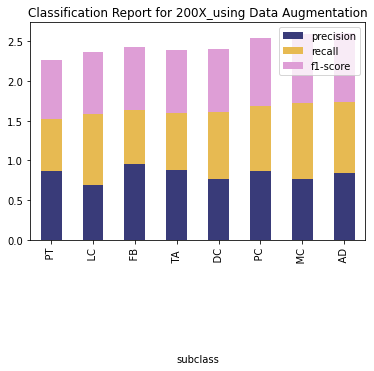

In [96]:
df.plot.bar(stacked=True,colormap='tab20b',title='Classification Report for 200X_using Data Augmentation');

In [ ]:
40_1=[76,25,83,25]
100_1=[77.02,84,38]
200_1=[75.62,81,25]
400_1=[75.00,80.00]



In [ ]:
yvals = [75.62,81,25]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [75.00,80.00]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')
  
plt.xlabel("Dates")
plt.ylabel('Scores')
plt.title("Players Score")
  
plt.xticks(ind+width,['2021Feb01', '2021Feb02', '2021Feb03'])
plt.legend( (bar1, bar2, bar3), ('Player1', 'Player2', 'Player3') )
plt.show()